In [1]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
((x_train,y_train),(x_test,y_test)) = load_data()


170500096/170498071 [==============================] - 11s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
#shape和以往不一樣
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [6]:
import numpy as np
a = np.array([[[2,1,2],[2,1,2],[2,1,2]],
              [[2,1,2],[2,1,2],[2,1,2]],
             ])
a.shape

(2, 3, 3)

In [7]:
names = [ 
  "airplane",										
  "automobile",										
  "bird",										
  "cat",										
  "deer",										
  "dog",										
  "frog",										
  "horse",										
  "ship",										
  "truck"
]

ANS: deer


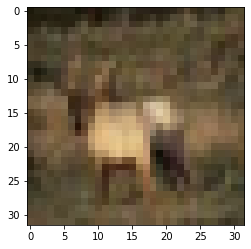

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 3
print("ANS:", names[y_train[idx][0]])
plt.imshow(x_train[idx])
# x_train[idx]

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
model = Sequential()
#一個filter (3*3*9)*64+64(bias)=1792
model.add(Conv2D(64,
                 (3,3),
                 padding="same",
                 activation="relu",
                 input_shape=(32,32,3)))
model.add(MaxPooling2D())
#一個filter (3*3*64)*128+128(bias)=73856
model.add(Conv2D(128,
                 (3,3),
                 padding="same",
                 activation="relu",
                 ))
model.add(MaxPooling2D())
model.add(Conv2D(256,
                 (3,3),
                 padding="same",
                 activation="relu",
                 ))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [10]:
#SparseCategoricalCrossentropy 取代 one-hot encoding

from tensorflow.keras.losses import SparseCategoricalCrossentropy 
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])


In [11]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
stop_callback = EarlyStopping(patience=3, restore_best_weights=True)
save_callback = ModelCheckpoint("fashion.h5", save_best_only=True)
model.fit(x_train_norm,
        y_train,
        batch_size=200,
        epochs=50,
        validation_split=0.1,
        callbacks=[stop_callback,save_callback],
        verbose=2)

Epoch 1/50
225/225 - 3s - loss: 1.7184 - accuracy: 0.3679 - val_loss: 1.4450 - val_accuracy: 0.4782
Epoch 2/50
225/225 - 3s - loss: 1.2953 - accuracy: 0.5356 - val_loss: 1.0565 - val_accuracy: 0.6236
Epoch 3/50
225/225 - 3s - loss: 1.1072 - accuracy: 0.6102 - val_loss: 0.9516 - val_accuracy: 0.6616
Epoch 4/50
225/225 - 3s - loss: 0.9678 - accuracy: 0.6612 - val_loss: 0.8607 - val_accuracy: 0.6996
Epoch 5/50
225/225 - 3s - loss: 0.8724 - accuracy: 0.6962 - val_loss: 0.8427 - val_accuracy: 0.7126
Epoch 6/50
225/225 - 3s - loss: 0.7974 - accuracy: 0.7228 - val_loss: 0.7562 - val_accuracy: 0.7368
Epoch 7/50
225/225 - 3s - loss: 0.7225 - accuracy: 0.7492 - val_loss: 0.7119 - val_accuracy: 0.7500
Epoch 8/50
225/225 - 3s - loss: 0.6596 - accuracy: 0.7714 - val_loss: 0.7043 - val_accuracy: 0.7550
Epoch 9/50
225/225 - 3s - loss: 0.6047 - accuracy: 0.7914 - val_loss: 0.7043 - val_accuracy: 0.7620
Epoch 10/50
225/225 - 3s - loss: 0.5457 - accuracy: 0.8067 - val_loss: 0.6928 - val_accuracy: 0.7684

In [13]:
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 4, 7])

In [14]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7174 - accuracy: 0.7614


[0.7173992991447449, 0.7613999843597412]

In [15]:
print(y_test.shape)
print(type(y_test))
print(y_test)
y_test_1d = y_test.reshape(-1)
print(y_test_1d.shape)
print(type(y_test_1d))
print(y_test_1d)

(10000, 1)
<class 'numpy.ndarray'>
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
(10000,)
<class 'numpy.ndarray'>
[3 8 8 ... 5 1 7]


In [16]:
import numpy as np

idx = np.nonzero(pre != y_test_1d)[0][:200]
false_pre_img = x_test[idx]
false_pre_label = y_test_1d[idx]
false_pre_predict = pre[idx]

width = 10
height = len(idx)//width + 1
plt.figure(figsize=(20,62))
for i,img in enumerate(false_pre_img):
  plt.subplot(height, width, i+1)
  t = "[P]:{}\n[O]:{}".format(names[false_pre_predict[i]],
                             names[false_pre_label[i]])
  plt.title(t)
  plt.axis("off")
  plt.imshow(img, cmap="gray")


Output hidden; open in https://colab.research.google.com to view.

In [17]:
from tensorflow.keras.preprocessing.image import load_img
f = input("檔名:")
img_raw = load_img(f, target_size=(32,32)).convert("RGB")
img = np.array(img_raw).reshape(1,32,32,3)/255
ans = mlp.predict_classes(img)[0]
print("正確答案應該是:", ans)
plt.imshow(img_raw, cmap="gray")

檔名: 


FileNotFoundError: ignored